In [1]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

In [14]:
# data_shakil = pd.read_excel('Assigned_Sentiment.xlsx')
data_compiled = pd.read_excel('Assigned_Sentiment_Compiled (1).xlsx')

In [15]:
# data_shakil.head()
data_compiled.head()

,Type,Customer comment/query,Sentiment,Tags,Real Sentiment,Name
0,message,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,Neutral,NaN,neutral,Shakil
1,message,২০০ টাকা ধার দেন,Neutral,NaN,neutral,Shakil
2,comment,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",Neutral,Feedback,neutral,Shakil
3,comment,কাস্টমার কেয়ারে কথা বলতে চাই,Neutral,Customer Care - Hotline,neutral,Shakil
4,comment,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,Neutral,Feedback,positive,Shakil


In [4]:
# data_shakil = data_shakil[data_shakil['Shakil']== 'Shakil']

In [5]:
# data_shakil.head()

In [16]:
# data_shakil = data_shakil[['Customer comment/query','Real Sentiment' ]]
data_compiled = data_compiled[['Customer comment/query','Real Sentiment' ]]

In [17]:
data_compiled

,Customer comment/query,Real Sentiment
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,neutral
1,২০০ টাকা ধার দেন,neutral
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",neutral
3,কাস্টমার কেয়ারে কথা বলতে চাই,neutral
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,positive
...,...,...
1321,khankir polara amar 2tk kaita nice ami 20 taka...,Negative
1322,Sobai robi ke talak den,Negative
1323,"বাংলাদেশের সবচেয়ে দুর্বল নেটওয়ার্ক রবি, সাক্ষী...",Negative
1324,নাম্বার ১ ছিটার রবি।,Negative


In [8]:
# from sklearn import preprocessing

In [9]:
# le = preprocessing.LabelEncoder()

In [10]:
# data_shakil['Real Sentiment'] = le.fit_transform(data_shakil['Real Sentiment'])

In [18]:
data_compiled['length']  = data_compiled['Customer comment/query'].str.len()

In [19]:
data_compiled.head()

,Customer comment/query,Real Sentiment,length
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,neutral,43.0
1,২০০ টাকা ধার দেন,neutral,16.0
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",neutral,69.0
3,কাস্টমার কেয়ারে কথা বলতে চাই,neutral,28.0
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,positive,98.0


In [20]:
# data_shakil = data_shakil[data_shakil['length'] > 2]
data_compiled = data_compiled[data_compiled['length'] > 2]

In [21]:
data_compiled

,Customer comment/query,Real Sentiment,length
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,neutral,43.0
1,২০০ টাকা ধার দেন,neutral,16.0
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",neutral,69.0
3,কাস্টমার কেয়ারে কথা বলতে চাই,neutral,28.0
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,positive,98.0
...,...,...,...
1321,khankir polara amar 2tk kaita nice ami 20 taka...,Negative,131.0
1322,Sobai robi ke talak den,Negative,23.0
1323,"বাংলাদেশের সবচেয়ে দুর্বল নেটওয়ার্ক রবি, সাক্ষী...",Negative,76.0
1324,নাম্বার ১ ছিটার রবি।,Negative,20.0


In [22]:
data_compiled['Real Sentiment'].value_counts()

Neutral     373
Positive    297
neutral     270
Negative    181
positive     92
negative      5
Name: Real Sentiment, dtype: int64

In [23]:
data_compiled['Real Sentiment'] = data_compiled['Real Sentiment'].str.upper() 

C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_compiled['Real Sentiment'].value_counts()

NEUTRAL     643
POSITIVE    389
NEGATIVE    186
Name: Real Sentiment, dtype: int64

C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Real Sentiment', ylabel='count'>

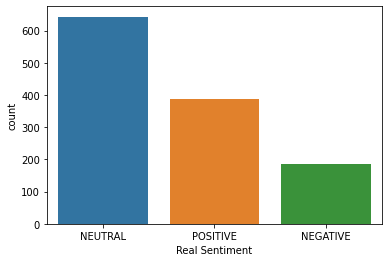

In [25]:
sns.countplot(data_compiled['Real Sentiment'])

In [26]:
data_compiled.reset_index(drop=True, inplace=True)

In [27]:
data_compiled

,Customer comment/query,Real Sentiment,length
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,NEUTRAL,43.0
1,২০০ টাকা ধার দেন,NEUTRAL,16.0
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",NEUTRAL,69.0
3,কাস্টমার কেয়ারে কথা বলতে চাই,NEUTRAL,28.0
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,POSITIVE,98.0
...,...,...,...
1218,khankir polara amar 2tk kaita nice ami 20 taka...,NEGATIVE,131.0
1219,Sobai robi ke talak den,NEGATIVE,23.0
1220,"বাংলাদেশের সবচেয়ে দুর্বল নেটওয়ার্ক রবি, সাক্ষী...",NEGATIVE,76.0
1221,নাম্বার ১ ছিটার রবি।,NEGATIVE,20.0


In [50]:
# wordart

In [28]:
from sklearn import preprocessing

In [29]:
le = preprocessing.LabelEncoder()

In [30]:
data_compiled['Real Sentiment'] = le.fit_transform(data_compiled['Real Sentiment'])

C:\Users\shakil.sumon\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_compiled

,Customer comment/query,Real Sentiment,length
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,1,43.0
1,২০০ টাকা ধার দেন,1,16.0
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",1,69.0
3,কাস্টমার কেয়ারে কথা বলতে চাই,1,28.0
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,2,98.0
...,...,...,...
1218,khankir polara amar 2tk kaita nice ami 20 taka...,0,131.0
1219,Sobai robi ke talak den,0,23.0
1220,"বাংলাদেশের সবচেয়ে দুর্বল নেটওয়ার্ক রবি, সাক্ষী...",0,76.0
1221,নাম্বার ১ ছিটার রবি।,0,20.0


In [32]:
data_compiled['Real Sentiment'].value_counts()

1    643
2    389
0    186
3      5
Name: Real Sentiment, dtype: int64

In [33]:
data_compiled[data_compiled['Real Sentiment'] == 3]

,Customer comment/query,Real Sentiment,length
253,Robir Video gulo deikha khub valo laglo gram b...,3,171.0
276,Matro 800 mb disa,3,17.0
277,নাফাখুম জলপ্রপাত সত্যিই মনোমুগ্ধকর জায়গা।,3,41.0
278,"প্রিয় দেশকে আমরা Explore করছি অনেকেই, এবার তা ...",3,67.0
279,"robi sobsomoy best offer ta dia thake,,r a jon...",3,100.0


In [34]:
data_compiled = data_compiled[data_compiled['Real Sentiment'] < 3]

In [35]:
data_compiled

,Customer comment/query,Real Sentiment,length
0,৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন,1,43.0
1,২০০ টাকা ধার দেন,1,16.0
2,"পৃথিবীতে সব বাবাই যদি এমন হত "" সবার ভাগ‍্য ...",1,69.0
3,কাস্টমার কেয়ারে কথা বলতে চাই,1,28.0
4,রবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অন...,2,98.0
...,...,...,...
1218,khankir polara amar 2tk kaita nice ami 20 taka...,0,131.0
1219,Sobai robi ke talak den,0,23.0
1220,"বাংলাদেশের সবচেয়ে দুর্বল নেটওয়ার্ক রবি, সাক্ষী...",0,76.0
1221,নাম্বার ১ ছিটার রবি।,0,20.0


In [56]:
comp = ''
for comment in data_compiled['Customer comment/query']:
    comp+=comment

In [57]:
comp

'৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন২০০ টাকা ধার দেনপৃথিবীতে  সব বাবাই যদি এমন হত "   সবার ভাগ\u200d্য বাবার   ছায়া জোটে না " কাস্টমার কেয়ারে কথা বলতে চাইরবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অনেক ভিডিও দেখলাম। অনেক সুন্দর ভিডিও, খুব উপভোগ করেছি।Mohammad Shefat Bhuiyan ki kore kinbo aktu bolben plzakhon ghore bose theke nij desh ke r deser shundorjo ke enjoyed korte parci,,  thanks robi ❣️❣️নতুন করে দেশের নানা সৌন্দর্যময় প্রান্ত সম্পর্কে জানতে পারছি।দারুন উপভোগ করছি ফিচারড্। চমৎকার উদ্যোগের জন্য রবির কাছে কৃতজ্ঞতা প্রকাশ করছি!রবির দাওয়া উদ্যোগের মাধ্যমে আমরা এখন ঘরে বসেই নিজের পছন্দের জায়গা গুলো দেখতে পারব এবং সবার মাঝে শেয়ার করতে পারবRobir moto kom dam e onno kuno sim company atto xoss xoss offer dite parbe na.no my nubr is artal not robiRobi ar net khub valo laga khub valo service dai amader k.. Robi network first houai o mom mulle valo valo Data pack offer peye internet use kore onek happy feel.অদেখা বিভিন্ন জায়গার সৌন্দর্য আমরা রবিরে অফ এন্ট্রির মাধ্যমে দেখতে পাই এ

In [58]:
import re

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [59]:
re_comp = emoji_pattern.sub(r'', comp)

In [60]:
re_comp

'৩০জিবি মেয়াদ ৩০দিন ৩০০টাকাই এই রকম অফার দেন২০০ টাকা ধার দেনপৃথিবীতে  সব বাবাই যদি এমন হত "   সবার ভাগ\u200d্য বাবার   ছায়া জোটে না " কাস্টমার কেয়ারে কথা বলতে চাইরবির আয়োজনগুলো সবসময়ই বেস্ট। রবির পেজে ঢুকে অনেক ভিডিও দেখলাম। অনেক সুন্দর ভিডিও, খুব উপভোগ করেছি।Mohammad Shefat Bhuiyan ki kore kinbo aktu bolben plzakhon ghore bose theke nij desh ke r deser shundorjo ke enjoyed korte parci,,  thanks robi ❣️❣️নতুন করে দেশের নানা সৌন্দর্যময় প্রান্ত সম্পর্কে জানতে পারছি।দারুন উপভোগ করছি ফিচারড্। চমৎকার উদ্যোগের জন্য রবির কাছে কৃতজ্ঞতা প্রকাশ করছি!রবির দাওয়া উদ্যোগের মাধ্যমে আমরা এখন ঘরে বসেই নিজের পছন্দের জায়গা গুলো দেখতে পারব এবং সবার মাঝে শেয়ার করতে পারবRobir moto kom dam e onno kuno sim company atto xoss xoss offer dite parbe na.no my nubr is artal not robiRobi ar net khub valo laga khub valo service dai amader k.. Robi network first houai o mom mulle valo valo Data pack offer peye internet use kore onek happy feel.অদেখা বিভিন্ন জায়গার সৌন্দর্য আমরা রবিরে অফ এন্ট্রির মাধ্যমে দেখতে পাই এ

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [62]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(re_comp)

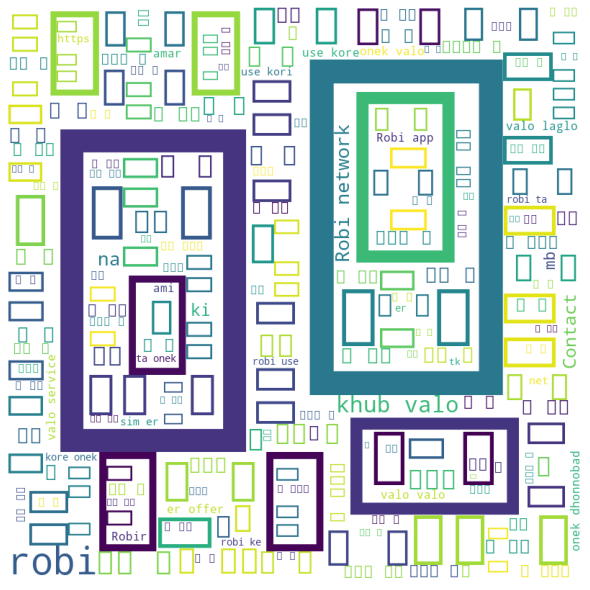

In [63]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordart_all.png')
plt.show()

In [36]:
train_data, test_data = train_test_split(data_compiled,random_state=42, test_size=0.2)

In [37]:
train_comments = []
test_comments = []

train_sentences = train_data['Customer comment/query'].values
train_labels = train_data['Real Sentiment'].values

for i in range(train_sentences.shape[0]):
    x=str(train_sentences[i])
    train_comments.append(x)
    
train_comments=np.array(train_comments)



test_sentences = test_data['Customer comment/query'].values
test_labels = test_data['Real Sentiment'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    test_comments.append(x)
    
test_comments=np.array(test_comments)




array(['সকল সিম এর কম দামে অফার নিতে আমাদের গ্রুপ এ তাকেন \nhttps://facebook.com/groups/329984775286444/',
       'বাহ ব্যাপারটা খুবই দারুন তো এখন 10 সেকেন্ডের ভিডিও শেয়ার করে রবির ফেসবুক ইনস্টাগ্রাম পেইজে ফিচার হয়ে নিতে পারব।❤️❤️❤️❤️',
       'Apnader network service khubi kharap...eto baje net,, 4G to pawa jayna,3G theke 2G asa jawa kore net chalano jayna..majhe majhe abar no service.... ??',
       'এই বক্সের সম্পূর্ণ লেখা গুলো সঠিকভাবে কপি করুন,তারপর ফেসবুকের বিভিন্ন গ্রুপে বা পেজে ১০টি পোস্টে কমেন্ট করুন। ↓↓↓\nআমি খুব সহজেই মোবাইল দিয়ে অনলাইনে জব করা শুরু করেছি। আপনিও চাইলে প্রতিদিন ৩০০-৫০০ টাকা আয় করতে পারবেন। আর এই কাজের জন্য আপনাকে কোনপ্রকার অ্যাড ফি দিতে হবে না।শুধুমাত্র ফেসবুক চালাতে জানলেই হবে। তাই আর দেরি না করে নিচের লিঙ্কে গিয়ে কাজ করা শুরু করে দিন। লিংক- https://o-b-d-lnejb-9880.blogspot.com/p/blog-page.html opknubbh789766kuyrfdetbnmk5thn',
       'robi sobsomoy best offer ta dia thake,,r a jonnoi robi ke atow vlo lage,,tnxx ayman vaiya & robi ke.',
       'Robir prott

In [38]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = test_labels=keras.utils.to_categorical(test_labels)

In [39]:
test_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [40]:
vocab_size = 2000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [41]:
print(train_comments.shape)
print(train_labels.shape)

(974,)
(974, 3)


In [42]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_comments)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(train_comments)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_comments)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

2521
Word index length:2521


In [43]:
# test_sequences

In [44]:
print("Sentence :--> \n")
print(train_comments[12]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[12])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[12])

Sentence :--> 

প্রতিদিন কত নতুন নতুন জায়গা দেখি।সেটা স্মৃতি করে রাখতে আমরা ফেসবুকে শেয়ার করি,কিন্তু এটা অনেক ভালো হয়েছে যে রবির মাধ্যমে আমার ভিডিও টি ও অনেক মানুষ দেখতে পারে।ধন্যবাদ রবি

Sentence Tokenized and Converted into Sequence :--> 

[264, 181, 52, 52, 182, 622, 623, 16, 624, 19, 472, 69, 149, 109, 164, 8, 6, 473, 106, 5, 42, 21, 20, 387, 93, 8, 474, 61, 625, 3]

After Padding the Sequence with padding length 100 :--> 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 264 181
  52  52 182 622 623  16 624  19 472  69 149 109 164   8   6 473 106   5
  42  21  20 387  93   8 474  61 625   3]


In [45]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (974, 100)
Padded shape(testing): (244, 100)


# Model Creation

In [46]:
model= Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(200, kernel_size=3, activation = "relu"))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
# model.add(Flatten())
model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Dense(3, activation='softmax'))

adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])




Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          600000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 200)           180200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 98, 128)           135680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 128)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
________________________________________________

In [47]:
history=model.fit(padded,train_labels,epochs=15,batch_size=32,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Instructions for updating:
Use tf.cast instead.
Train on 974 samples, validate on 244 samples
Epoch 1/15
974/974 [==============================] - 8s 8ms/step - loss: 1.5171 - accuracy: 0.6294 - val_loss: 1.2042 - val_accuracy: 0.7582
Epoch 2/15
974/974 [==============================] - 6s 6ms/step - loss: 1.1067 - accuracy: 0.7690 - val_loss: 0.9604 - val_accuracy: 0.8074
Epoch 3/15
974/974 [==============================] - 6s 6ms/step - loss: 0.8657 - accuracy: 0.8439 - val_loss: 0.8929 - val_accuracy: 0.7992
Epoch 4/15
974/974 [==============================] - 6s 6ms/step - loss: 0.6822 - accuracy: 0.8963 - val_loss: 0.8487 - val_accuracy: 0.8033
Epoch 5/15
974/974 [==============================] - 6s 7ms/step - loss: 0.5571 - accuracy: 0.9251 - val_loss: 0.8544 - val_accuracy: 0.7910
Epoch 6/15
974/974 [==============================] - 6s 6ms/step - loss: 0.4740 - accuracy: 0.9394 - val_loss: 0.8456 - val_accuracy: 0.8033
Epoch 7/15
974/974 [==============================] - 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


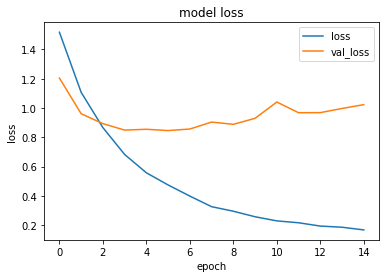

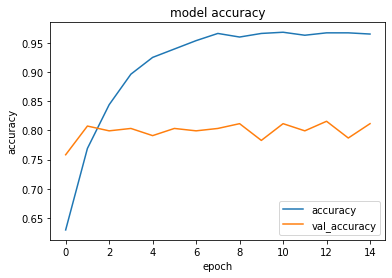

In [48]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [49]:
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

974/974 [==============================] - 1s 1ms/step
The train accuracy is: 0.9681724905967712
244/244 [==============================] - 0s 1ms/step
The test accuracy is: 0.811475396156311


In [51]:
model.save('model')

In [52]:
!pip install deeplift

  Created wheel for deeplift: filename=deeplift-0.6.13.0-py3-none-any.whl size=36452 sha256=3fb8eedf7b0a9130e81bbe578ed8c839aeaac551d30a5f16b89911fd86648be2
  Stored in directory: c:\users\shakil.sumon\appdata\local\pip\cache\wheels\29\06\a0\d502e1688a335a8cae521c99d8bf253fc116158f179d3784f3
Successfully built deeplift
